In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
irisdf = sns.load_dataset('iris')
irisdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
irisdf.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [5]:
X = irisdf.drop('species', axis=1) # features
y = irisdf.species # target
y_encoded = LabelEncoder().fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_encoded, 
                                                    test_size=0.2, 
                                                    random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

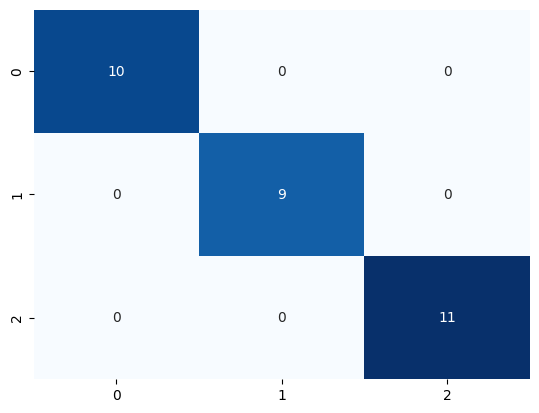

In [8]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, cmap='Blues', cbar=False)

In [9]:
print(classification_report(y_test, y_pred, target_names=irisdf.species.unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

